In [16]:
import pandas as pd

#read all dfs
dfEducation = pd.read_csv('/Users/abhinavannabathula/Desktop/176PROJECT/education.csv')
dfUnemployment = pd.read_csv('/Users/abhinavannabathula/Desktop/176PROJECT/unemployment.csv')
dfGDP = pd.read_csv('/Users/abhinavannabathula/Desktop/176PROJECT/gdp.csv')

In [17]:
# clean and filtering education
dfEducation = dfEducation.dropna() 
dfEducation = dfEducation.drop_duplicates() 

columns_to_drop = [
    "2003 Rural-urban Continuum Code",
    "2003 Urban Influence Code",
    "2013 Rural-urban Continuum Code",
    "2013 Urban Influence Code",
    "City/Suburb/Town/Rural 2013",
    "FIPS Code"
]

dfEducation = dfEducation.drop(columns=columns_to_drop)
dfEducation = dfEducation.groupby('State').mean(numeric_only=True).reset_index()

In [18]:
dfEducation.head()

,State,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1990",...,"Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,AK,49.226316,28.536842,11.047368,11.194737,28.763158,35.489474,18.494737,17.257895,21.015789,...,29.900000,18.321053,16.684211,32.521053,30.789474,20.021053,9.821053,34.815789,32.047368,23.310526
1,AL,65.255224,23.017910,5.853731,5.865672,50.726866,30.040299,10.046269,9.202985,40.204478,...,18.300000,11.243284,30.347761,32.829851,23.322388,13.489552,17.231343,35.814925,28.907463,18.052239
2,AR,66.050667,23.008000,5.926667,5.012000,50.148000,32.185333,9.376000,8.281333,38.937333,...,17.116000,9.884000,29.036000,36.644000,22.018667,12.312000,15.556000,38.625333,29.306667,16.517333
3,AZ,49.821429,29.078571,11.342857,9.721429,35.292857,33.771429,17.814286,13.121429,29.628571,...,27.557143,13.978571,24.164286,27.221429,31.971429,16.621429,14.978571,27.807143,36.257143,20.935714
4,CA,41.355172,32.900000,15.031034,10.705172,27.365517,34.039655,21.929310,16.674138,23.643103,...,31.643103,18.774138,21.260345,23.796552,33.362069,21.572414,15.312069,23.565517,33.841379,27.291379


In [19]:
# cleaning and filtering dfUnemployment
dfUnemployment = dfUnemployment.dropna()  # Drop rows with NaN values
dfUnemployment = dfUnemployment.drop_duplicates()  # Remove duplicate rows
dfUnemployment = dfUnemployment.groupby('State').mean(numeric_only=True).reset_index()


columns_to_drop = [
    'FIPS_Code',
    'Rural_urban_continuum_code_2013',
    'Metro_2013',
    'Urban_influence_code_2013',
]

dfUnemployment = dfUnemployment.drop(columns=columns_to_drop)  # Drop specified columns

In [20]:
dfUnemployment.head(50)

,State,Unemployment_rate_2000,Unemployment_rate_2001,Unemployment_rate_2002,Unemployment_rate_2003,Unemployment_rate_2004,Unemployment_rate_2005,Unemployment_rate_2006,Unemployment_rate_2007,Unemployment_rate_2008,...,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Med_HH_Income_Percent_of_State_Total_2019
0,AK,7.820833,8.058333,9.112500,9.720833,9.625000,9.120833,8.575000,7.908333,8.066667,...,10.512500,10.420833,9.945833,8.937500,8.812500,8.325000,7.641667,7.166667,9.225000,88.979167
1,AL,5.571642,6.331343,7.047761,7.032836,6.550746,5.138806,4.723881,5.002985,7.217910,...,9.480597,8.617910,7.856716,7.080597,6.704478,5.213433,4.461194,3.477612,6.283582,89.134328
2,AR,4.741333,5.428000,6.024000,6.553333,6.405333,6.113333,5.974667,6.149333,6.146667,...,8.164000,7.980000,6.692000,5.702667,4.622667,4.292000,4.173333,4.152000,6.293333,89.946667
3,AZ,6.080000,6.726667,7.900000,7.633333,6.940000,6.586667,6.100000,5.306667,7.653333,...,11.226667,10.800000,9.460000,8.753333,7.773333,6.853333,6.646667,6.640000,8.986667,83.040000
4,CA,6.172414,6.629310,7.696552,8.034483,7.532759,6.779310,6.256897,6.712069,8.651724,...,12.336207,10.531034,8.924138,7.581034,6.950000,6.082759,5.348276,5.246552,9.717241,88.329310
5,CO,3.228125,3.873438,5.131250,5.668750,5.273438,4.934375,4.151562,3.532812,4.617188,...,7.976562,6.985938,5.167187,3.873438,3.206250,2.629688,3.057812,2.739063,6.412500,81.262500
6,CT,2.037500,2.750000,4.225000,5.262500,4.950000,4.675000,4.312500,4.375000,5.512500,...,8.225000,7.825000,6.487500,5.500000,4.725000,4.275000,3.800000,3.487500,7.625000,100.337500
7,DC,5.700000,6.500000,7.000000,7.300000,8.100000,7.000000,6.300000,6.000000,6.800000,...,9.000000,8.400000,7.700000,6.900000,6.200000,6.100000,5.700000,5.400000,8.000000,100.000000
8,DE,3.700000,3.666667,4.166667,4.333333,4.100000,4.266667,3.700000,3.566667,5.033333,...,7.266667,6.800000,5.766667,4.933333,4.600000,4.533333,3.800000,3.766667,7.933333,94.633333
9,FL,4.074627,4.808955,4.956716,4.465672,3.850746,2.925373,2.558209,3.413433,5.862687,...,8.977612,7.861194,6.807463,5.838806,5.152239,4.467164,3.886567,3.668657,6.637313,91.704478


In [21]:
# cleaning and filtering dfGDP
dfGDP = dfGDP.dropna() 
dfGDP = dfGDP.drop_duplicates()
dfGDP.drop(columns=['TableName', 'LineCode', 'Region', 'Description', 'Unit', 'IndustryClassification', 'GeoFIPS'], inplace=True)
dfGDP.loc[:, dfGDP.columns != 'GeoName'] = dfGDP.loc[:, dfGDP.columns != 'GeoName'].apply(pd.to_numeric, errors='coerce', downcast='integer')
dfGDP = dfGDP.groupby('GeoName').sum().reset_index()


In [22]:
dfGDP.head(5)

,GeoName,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,561619.3,590503.9,621062.6,643541.7,659304.7,684739.3,714531.8,790026.0,840378.3,...,972930.0,1000119.9,1034234.5,1047790.4,1075061.5,1097144.2,1132450.7,1189403.6,1225351.4,1070711.3
1,Alaska,134073.7,124399.2,126793.6,138067.5,146718.3,151898.1,163404.8,181442.3,208395.3,...,299478.5,306498.1,300748.2,294642.6,264297.5,257771.6,269344.7,282771.1,282068.2,227037.3
2,Arizona,718390.8,776303.9,843059.9,889870.9,923557.0,965370.2,1039364.1,1098292.0,1215903.4,...,1382774.1,1440610.3,1474517.4,1531491.2,1609991.0,1688935.9,1779834.9,1894555.7,2000774.8,1773274.3
3,Arkansas,330825.5,343953.5,368863.8,377968.2,386630.5,405181.7,428668.6,462797.9,489095.1,...,567556.5,579762.3,609697.8,629458.6,636862.0,643724.5,664863.4,692177.9,708955.3,622331.8
4,California,5859779.4,6268759.6,6832399.6,7490125.7,7554411.1,7802845.8,8312210.9,8859296.1,9537634.9,...,11213299.7,11764575.8,12410313.5,13170569.4,14052079.2,14671598.5,15598135.9,16410439.6,17278016.7,14911695.5


In [23]:
state_abbrev_to_full = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

dfEducation['State'] = dfEducation['State'].map(state_abbrev_to_full)
dfUnemployment['State'] = dfUnemployment['State'].map(state_abbrev_to_full)

In [24]:
df_merged = pd.merge(dfGDP, dfEducation, left_on='GeoName', right_on='State', how='inner')
df_merged = pd.merge(df_merged, dfUnemployment, on='State', how='inner')
df_merged_sorted = df_merged.sort_values(by='Med_HH_Income_Percent_of_State_Total_2019', ascending=False)

In [25]:
df_merged_sorted.head()

,GeoName,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Med_HH_Income_Percent_of_State_Total_2019
38,Rhode Island,155630.5,165762.8,173385.4,184862.0,192773.8,204580.3,214649.3,230958.0,240348.5,...,9.600000,8.920000,7.260000,5.660000,4.860000,4.140000,3.760000,3.340000,8.500000,111.280000
27,Nevada,320034.3,345940.1,381333.1,410624.1,430948.4,455428.0,483950.4,553783.7,626182.6,...,10.600000,9.417647,7.870588,6.917647,5.770588,4.688235,4.135294,3.676471,6.782353,102.417647
13,Indiana,969107.2,1053316.7,1100091.8,1160008.7,1163053.5,1210739.4,1275232.1,1352994.5,1386716.1,...,8.336957,7.605435,5.954348,4.810870,4.405435,3.506522,3.381522,3.216304,6.671739,101.610870
6,Connecticut,773257.4,810731.4,848095.2,922480.5,961144.1,981076.0,1007691.5,1107664.1,1162501.9,...,8.225000,7.825000,6.487500,5.500000,4.725000,4.275000,3.800000,3.487500,7.625000,100.337500
29,New Jersey,1698357.7,1759642.6,1853560.5,1991221.0,2050803.4,2124842.3,2214666.2,2304253.2,2397237.8,...,9.857143,8.861905,7.161905,6.133333,5.290476,4.852381,4.295238,3.695238,9.952381,99.276190


In [26]:
df_merged_sorted.columns

Index(['GeoName', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'State',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adults completing some college (1-3 years), 1980',
       'Percent of adults completing four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1990',
       'Percent of adults with a high school diploma only, 1990',
       'Percent of adults completing some college or associate

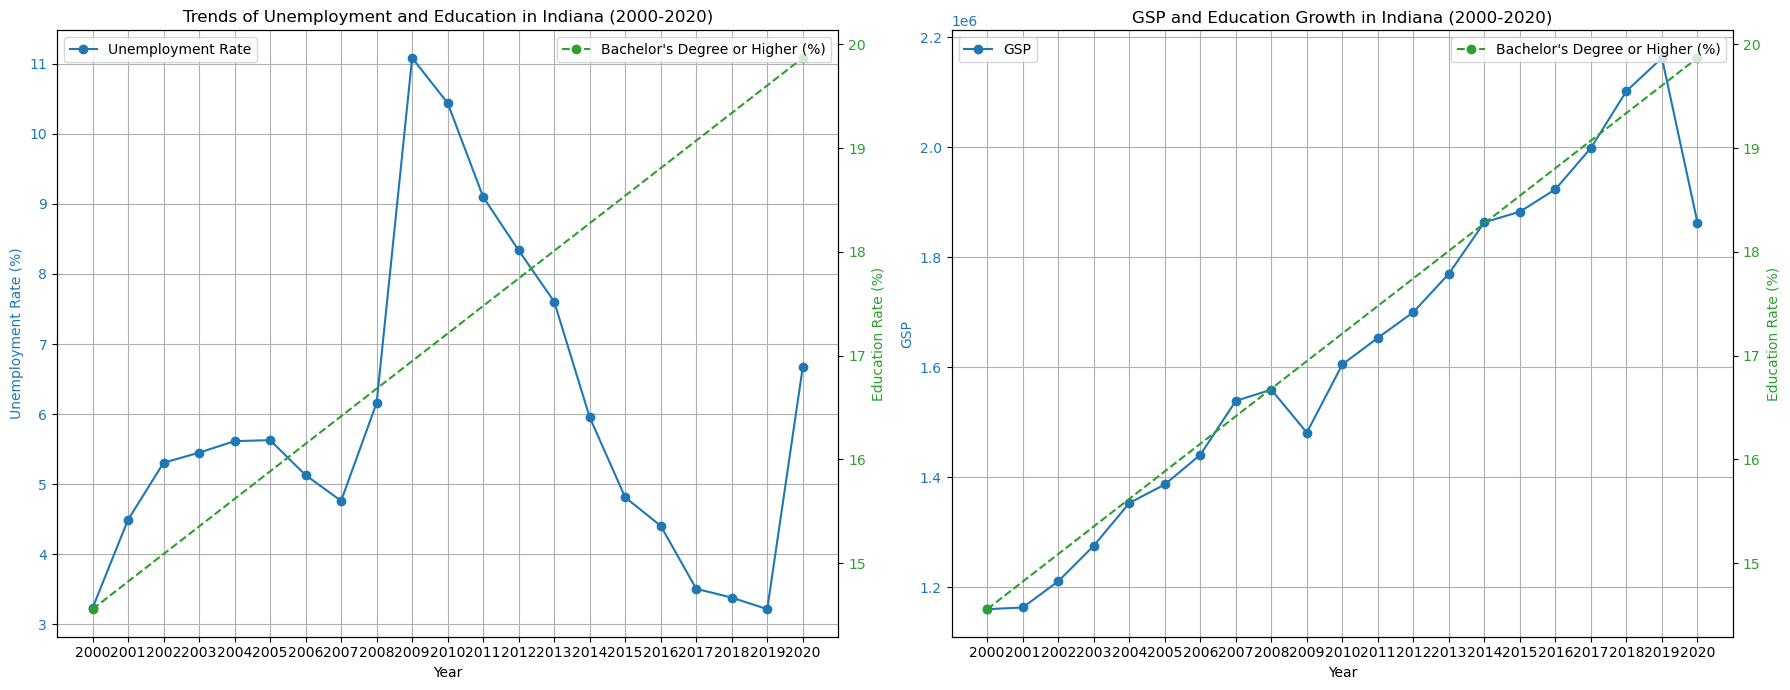

In [37]:
import matplotlib.pyplot as plt

# Extract data for Indiana
indiana_data = df_merged_sorted[df_merged_sorted['GeoName'] == 'Indiana']

# Generate dynamic lists of years for unemployment and GDP
all_years = [str(year) for year in range(2000, 2021)]
unemployment_columns = [f"Unemployment_rate_{year}" for year in range(2000, 2021)]
gdp_columns = [str(year) for year in range(2000, 2021)]

# Ensure columns exist in the dataset
unemployment_columns = [col for col in unemployment_columns if col in indiana_data.columns]
gdp_columns = [col for col in gdp_columns if col in indiana_data.columns]

# Extract data for plots
unemployment_years = [col.split('_')[-1] for col in unemployment_columns]
unemployment_rate = indiana_data[unemployment_columns].values.flatten()

gdp_years = gdp_columns
gdp_data = indiana_data[gdp_columns].values.flatten()

# Education data (assuming fixed years as before)
education_years = ['2000', '2020']
education_data = [
    indiana_data["Percent of adults with a bachelor's degree or higher, 2000"].iloc[0],
    indiana_data["Percent of adults with a bachelor's degree or higher, 2015-19"].iloc[0]
]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Unemployment Rate and Education
ax1.plot(unemployment_years, unemployment_rate, color='tab:blue', marker='o', label='Unemployment Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax1_2 = ax1.twinx()
ax1_2.plot(education_years, education_data, color='tab:green', marker='o', linestyle='--', label='Bachelor\'s Degree or Higher (%)')
ax1_2.set_ylabel('Education Rate (%)', color='tab:green')
ax1_2.tick_params(axis='y', labelcolor='tab:green')
ax1_2.legend(loc='upper right')

ax1.set_title('Trends of Unemployment and Education in Indiana (2000-2020)')
ax1.grid(True)

# GDP and Education
ax2.plot(gdp_years, gdp_data, color='tab:blue', marker='o', label='GSP')
ax2.set_xlabel('Year')
ax2.set_ylabel('GSP', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='upper left')

ax2_2 = ax2.twinx()
ax2_2.plot(education_years, education_data, color='tab:green', marker='o', linestyle='--', label='Bachelor\'s Degree or Higher (%)')
ax2_2.set_ylabel('Education Rate (%)', color='tab:green')
ax2_2.tick_params(axis='y', labelcolor='tab:green')
ax2_2.legend(loc='upper right')

ax2.set_title('GSP and Education Growth in Indiana (2000-2020)')
ax2.grid(True)

# Layout adjustment and plot display
plt.tight_layout()
plt.show()


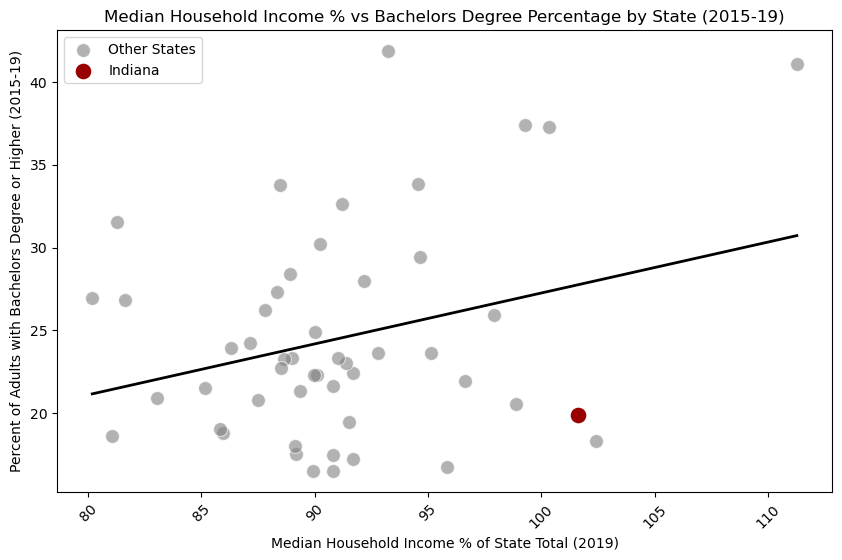

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define Indiana's data point
indiana_data = df_merged_sorted[
    df_merged_sorted['State'] == 'Indiana'
]

# Plot Median Household Income Percentage vs Education Level
plt.figure(figsize=(10, 6))

# Scatter plot for all points
sns.scatterplot(data=df_merged_sorted, 
                x='Med_HH_Income_Percent_of_State_Total_2019', 
                y="Percent of adults with a bachelor's degree or higher, 2015-19",
                s=100, alpha=0.6, color='gray', label="Other States")

# Highlight Indiana in a different color
sns.scatterplot(data=indiana_data, 
                x='Med_HH_Income_Percent_of_State_Total_2019', 
                y="Percent of adults with a bachelor's degree or higher, 2015-19",
                s=150, color='#990000', label="Indiana")

# Add regression line
sns.regplot(data=df_merged_sorted, 
            x='Med_HH_Income_Percent_of_State_Total_2019', 
            y="Percent of adults with a bachelor's degree or higher, 2015-19",
            scatter=False, line_kws={'color': 'black', 'lw': 2}, ci=None)

plt.title('Median Household Income % vs Bachelors Degree Percentage by State (2015-19)')
plt.xlabel('Median Household Income % of State Total (2019)')
plt.ylabel('Percent of Adults with Bachelors Degree or Higher (2015-19)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


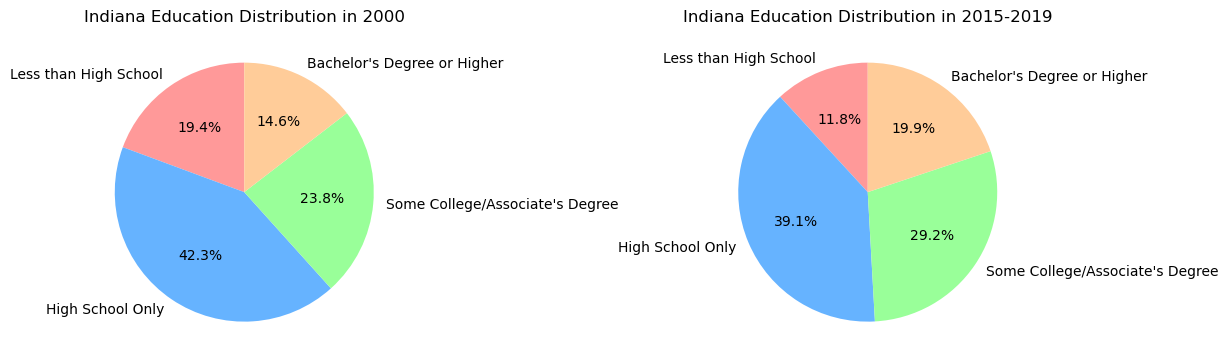

In [29]:
# Filter the data for Indiana (GeoName = 'Indiana')
indiana_data_2000 = df_merged_sorted[df_merged_sorted['GeoName'] == 'Indiana'][[
    'Percent of adults with less than a high school diploma, 2000',
    'Percent of adults with a high school diploma only, 2000',
    'Percent of adults completing some college or associate\'s degree, 2000',
    'Percent of adults with a bachelor\'s degree or higher, 2000'
]].iloc[0]  # Selecting the first row (Indiana data)

indiana_data_2015_2019 = df_merged_sorted[df_merged_sorted['GeoName'] == 'Indiana'][[
    'Percent of adults with less than a high school diploma, 2015-19',
    'Percent of adults with a high school diploma only, 2015-19',
    'Percent of adults completing some college or associate\'s degree, 2015-19',
    'Percent of adults with a bachelor\'s degree or higher, 2015-19'
]].iloc[0]

# Prepare labels and data for the pie charts
education_labels = ['Less than High School', 'High School Only', 'Some College/Associate\'s Degree', 'Bachelor\'s Degree or Higher']
education_data_2000 = indiana_data_2000
education_data_2015_2019 = indiana_data_2015_2019

# Plot the first pie chart for the year 2000
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Plot 1
plt.pie(education_data_2000, labels=education_labels, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'])
plt.title('Indiana Education Distribution in 2000')

# Plot the second pie chart for the year 2015-2019
plt.subplot(1, 2, 2)  # Plot 2
plt.pie(education_data_2015_2019, labels=education_labels, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'])
plt.title('Indiana Education Distribution in 2015-2019')

# Show the pie charts
plt.tight_layout()
plt.show()


/var/folders/rj/r46y8fy14_s1ds1jl2r2fvch0000gn/T/ipykernel_8387/4020582668.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pivot_education, x='Education Level', y='Education Percent', hue='Region',


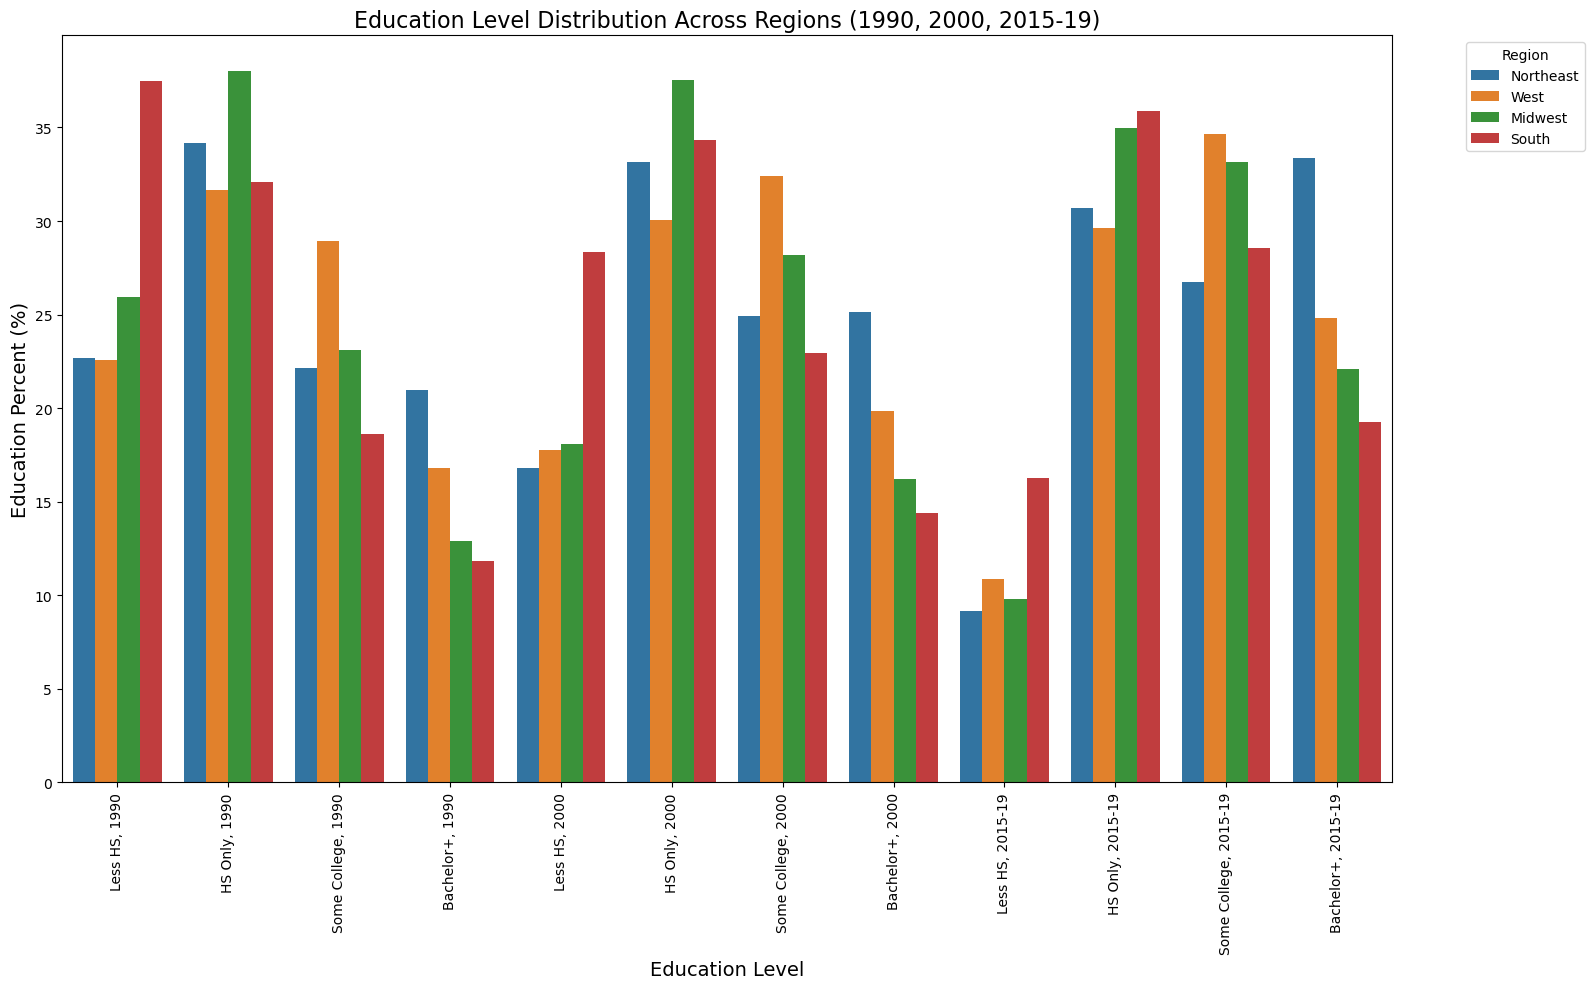

In [32]:
# Define region mapping for states (This is an example, you can adjust as needed)
region_mapping = {
    'Alabama': 'South', 'Alaska': 'West', 'Arizona': 'West', 'Arkansas': 'South',
    'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'Northeast',
    'Florida': 'South', 'Georgia': 'South', 'Hawaii': 'West', 'Idaho': 'West',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest',
    'Kentucky': 'South', 'Louisiana': 'South', 'Maine': 'Northeast', 'Maryland': 'Northeast',
    'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Mississippi': 'South',
    'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest', 'Nevada': 'West',
    'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New Mexico': 'West',
    'New York': 'Northeast', 'North Carolina': 'South', 'North Dakota': 'Midwest',
    'Ohio': 'Midwest', 'Oklahoma': 'South', 'Oregon': 'West', 'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast', 'South Carolina': 'South', 'South Dakota': 'Midwest',
    'Tennessee': 'South', 'Texas': 'South', 'Utah': 'West', 'Vermont': 'Northeast',
    'Virginia': 'South', 'Washington': 'West', 'West Virginia': 'South', 'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Filter the education columns to include only data from 1990, 2000, and 2015-19
education_columns_selected = [
    'Percent of adults with less than a high school diploma, 1990',
    'Percent of adults with a high school diploma only, 1990',
    'Percent of adults completing some college or associate\'s degree, 1990',
    'Percent of adults with a bachelor\'s degree or higher, 1990',
    'Percent of adults with less than a high school diploma, 2000',
    'Percent of adults with a high school diploma only, 2000',
    'Percent of adults completing some college or associate\'s degree, 2000',
    'Percent of adults with a bachelor\'s degree or higher, 2000',
    'Percent of adults with less than a high school diploma, 2015-19',
    'Percent of adults with a high school diploma only, 2015-19',
    'Percent of adults completing some college or associate\'s degree, 2015-19',
    'Percent of adults with a bachelor\'s degree or higher, 2015-19'
]

# Pivot the data to focus only on the selected columns
pivot_education = df_merged_sorted[['GeoName', 'State'] + education_columns_selected]
pivot_education = pivot_education.set_index(['GeoName', 'State']).stack().reset_index(name='Education Percent')

# Update column names
pivot_education.columns = ['GeoName', 'State', 'Education Level', 'Education Percent']

# Map each state to its region
pivot_education['Region'] = pivot_education['State'].map(region_mapping)

# Shorten the names for better readability
education_level_mapping = {
    'Percent of adults with less than a high school diploma, 1990': 'Less HS, 1990',
    'Percent of adults with a high school diploma only, 1990': 'HS Only, 1990',
    'Percent of adults completing some college or associate\'s degree, 1990': 'Some College, 1990',
    'Percent of adults with a bachelor\'s degree or higher, 1990': 'Bachelor+, 1990',
    'Percent of adults with less than a high school diploma, 2000': 'Less HS, 2000',
    'Percent of adults with a high school diploma only, 2000': 'HS Only, 2000',
    'Percent of adults completing some college or associate\'s degree, 2000': 'Some College, 2000',
    'Percent of adults with a bachelor\'s degree or higher, 2000': 'Bachelor+, 2000',
    'Percent of adults with less than a high school diploma, 2015-19': 'Less HS, 2015-19',
    'Percent of adults with a high school diploma only, 2015-19': 'HS Only, 2015-19',
    'Percent of adults completing some college or associate\'s degree, 2015-19': 'Some College, 2015-19',
    'Percent of adults with a bachelor\'s degree or higher, 2015-19': 'Bachelor+, 2015-19'
}

pivot_education['Education Level'] = pivot_education['Education Level'].map(education_level_mapping)

# Plot with shortened labels
plt.figure(figsize=(16, 10))
sns.barplot(data=pivot_education, x='Education Level', y='Education Percent', hue='Region', 
            palette='tab10', ci=None)

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add titles and labels
plt.title('Education Level Distribution Across Regions (1990, 2000, 2015-19)', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Education Percent (%)', fontsize=14)

# Adjust legend placement
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


/var/folders/rj/r46y8fy14_s1ds1jl2r2fvch0000gn/T/ipykernel_8387/1647312197.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Region', y='Unemployment_Rate',


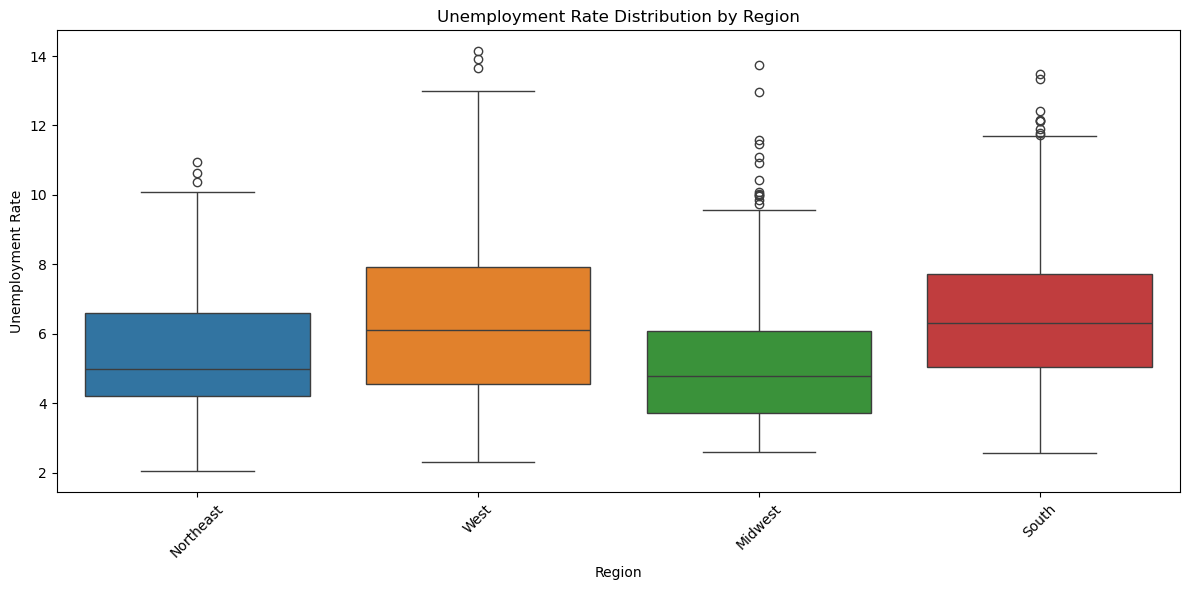

In [33]:
df_merged_sorted['Region'] = df_merged_sorted['State'].map(region_mapping)

# Select unemployment rate columns
unemployment_cols = [col for col in df_merged_sorted.columns if "Unemployment_rate" in col]

# Melt the DataFrame to make it tidy
df_melted = df_merged_sorted.melt(id_vars=['Region'], 
                                  value_vars=unemployment_cols, 
                                  var_name='Year', 
                                  value_name='Unemployment_Rate')

# Filter out rows with NaN regions or unemployment rates
df_melted = df_melted.dropna(subset=['Region', 'Unemployment_Rate'])


region_colors = {
    'Northeast': '#1f77b4',
    'Midwest': '#2ca02c',
    'South': '#d62728',
    'West': '#ff7f0e'
}

# Create a palette for Seaborn using the color mapping
palette = {region: region_colors[region] for region in df_melted['Region'].unique()}

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Region', y='Unemployment_Rate', 
            palette=[palette[region] for region in df_melted['Region'].unique()])
plt.title('Unemployment Rate Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()